## Imports

In [1]:
import pandas as pd
from my_model_package.forecasting.utils import pre_processing
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Load Data

In [2]:
df = pd.read_csv('data/blight_violations.csv')

/var/folders/zw/4h84gc_n5ds1nwwpkbv509c00000gn/T/ipykernel_12840/1477661346.py:1: DtypeWarning: Columns (7,9,13,14,15,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/blight_violations.csv')


## Apply Processing Function

In [3]:
df = pre_processing(df)

/Users/pierre.muller/Desktop/Projet stan/ML_Deployment-Judgment_Outputs/my_model_package/forecasting/utils.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['violation_category'] = df['violation_description'].astype(str).apply(lambda x: map_violation_category(x))
/Users/pierre.muller/Desktop/Projet stan/ML_Deployment-Judgment_Outputs/my_model_package/forecasting/utils.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['violation_category'] = df.apply(convert_to_other, axis=1)
/Users/pierre.mull

In [5]:
data = df.copy()

## Print df

In [10]:
df.head()

,agency_name,violation_street_name,state,violation_date,hearing_date,hearing_time,judgment_date,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,judgment_amount,balance_due,payment_status,violation_category,is_judgment_later
1,"Buildings, Safety Engineering & Env Department",Charlevoix,Mi,2006-11-08 00:00:00,2006-11-30 00:00:00,9:00AM,2006-11-30 10:23:59,Responsible by Default,250.0,20.0,10.0,0.0,0.0,280.0,280.0,NO PAYMENT,No Certificate,1
2,"Buildings, Safety Engineering & Env Department",Chrysler,Mi,2006-11-08 00:00:00,2006-11-30 00:00:00,9:00AM,2006-11-30 00:00:00,Responsible by Admission,250.0,20.0,10.0,0.0,0.0,280.0,280.0,PAID IN FULL,No Certificate,0
3,"Buildings, Safety Engineering & Env Department",St marys,Mi,2006-11-08 00:00:00,2006-12-13 00:00:00,3:00PM,2006-12-13 15:23:18,Responsible by Default,250.0,20.0,10.0,0.0,0.0,280.0,280.0,NO PAYMENT,No Certificate,1
6,"Buildings, Safety Engineering & Env Department",Warren,Mi,2006-11-08 00:00:00,2006-11-30 00:00:00,9:00AM,2006-11-30 10:23:03,Responsible by Default,250.0,20.0,10.0,0.0,0.0,280.0,280.0,NO PAYMENT,No Certificate,1
9,"Buildings, Safety Engineering & Env Department",Oakland,Mi,2006-11-08 00:00:00,2006-11-30 00:00:00,9:00AM,2006-11-30 10:26:26,Responsible by Default,250.0,20.0,10.0,0.0,0.0,280.0,280.0,NO PAYMENT,No Certificate,1


In [11]:
df.isnull().sum()

agency_name                 0
violation_street_name      17
state                    3709
violation_date              0
hearing_date                0
hearing_time                0
judgment_date               0
disposition                 0
fine_amount                 2
admin_fee                   0
state_fee                   0
late_fee                    6
discount_amount             3
judgment_amount             0
balance_due                 0
payment_status              0
violation_category          0
is_judgment_later           0
dtype: int64

In [12]:
df.dropna(inplace=True)

## Feature Engineering

### Columns

In [17]:
df.columns

Index(['agency_name', 'violation_street_name', 'state', 'violation_date',
       'hearing_date', 'hearing_time', 'judgment_date', 'disposition',
       'fine_amount', 'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'judgment_amount', 'balance_due', 'payment_status',
       'violation_category', 'is_judgment_later'],
      dtype='object')

In [13]:
df.drop(columns=['disposition','violation_date','hearing_date','hearing_time','judgment_date'],inplace=True)

### Keep only the values with sufficent number of occurrences to avoid overfitting

#### Agency Name

In [9]:
df['agency_name'].value_counts()

agency_name
Buildings, Safety Engineering & Env Department    200552
BSEED Environmental Affairs                       153679
Detroit Police Department                          13778
Health Department                                   5466
Neighborhood City Halls                                1
Name: count, dtype: int64

With only 1 occurrence, Neighborhood City Halls must be removed to avoid training the model on such unique value.

In [10]:
df = df.query("agency_name != 'Neighborhood City Halls'")

#### Violation Street Name

In [11]:
count_street = df['violation_street_name'].value_counts()

In [12]:
count_street.describe()

count    1841.000000
mean      202.865291
std       454.125142
min         1.000000
25%        11.000000
50%        48.000000
75%       206.000000
max      6976.000000
Name: count, dtype: float64

Keep only the rows with occurrences>50 or remove this feature ?

#### State

In [13]:
state_count = df['state'].value_counts()

#### Fine Amount

In [14]:
df['fine_amount'].describe()

count    373475.000000
mean        310.436496
std         446.711317
min           1.000000
25%         100.000000
50%         250.000000
75%         250.000000
max       10000.000000
Name: fine_amount, dtype: float64

In [15]:
df = df.drop(columns=['fine_amount'])

#### Admin Fee

In [16]:
df['admin_fee'].describe()

count    373475.0
mean         20.0
std           0.0
min          20.0
25%          20.0
50%          20.0
75%          20.0
max          20.0
Name: admin_fee, dtype: float64

In [17]:
df['admin_fee'].value_counts()

admin_fee
20.0    373475
Name: count, dtype: int64

Admin Fee always has the same value.
It is better to remove this feature.

In [18]:
df = df.drop(columns=['admin_fee'])

#### State Fee

In [19]:
df['state_fee'].value_counts()

state_fee
10.0    373475
Name: count, dtype: int64

Same for State Fee, let's remove it as well.

In [20]:
df = df.drop(columns=['state_fee'])

#### Late Fee

In [21]:
df['late_fee'].value_counts()

late_fee
0.00      275678
25.00      32599
5.00       16699
10.00      13048
50.00      12959
           ...  
145.00         1
51.00          1
0.26           1
56.35          1
222.00         1
Name: count, Length: 126, dtype: int64

In [22]:
df['late_fee'].describe()

count    373475.000000
mean          8.040115
std          25.483829
min          -1.000000
25%           0.000000
50%           0.000000
75%           5.000000
max        1000.000000
Name: late_fee, dtype: float64

The values for late fees seeem to vary a lot. It's also better to remove it.

In [23]:
df = df.drop(columns=['late_fee'])

#### Discount Amount

In [24]:
df['discount_amount'].value_counts()

discount_amount
0.0       345907
25.0        8916
5.0         5948
10.0        5094
20.0        3466
50.0        2340
100.0        611
12.5         198
2.5          186
80.0         172
150.0        138
30.0         132
75.0          92
40.0          73
350.0         45
250.0         43
60.0          35
35.0          23
200.0         16
37.5          11
125.0         10
500.0          7
120.0          4
1000.0         3
255.0          2
930.0          1
300.0          1
3.0            1
Name: count, dtype: int64

It would be better to transform this information to identify the presence of a discount, and not its amount.

In [25]:
def amount_to_discount(row):
    if row['discount_amount']==0:
        return "No Discount"
    else:
        return "Discount"



In [26]:
df['discount_status'] = df.apply(amount_to_discount, axis=1)

In [27]:
df = df.drop(columns=['discount_amount'])

#### Judgment Amount

In [28]:
df['judgment_amount'].describe()

count    373475.000000
mean        355.372300
std         484.020992
min         -20.000000
25%         130.000000
50%         280.000000
75%         305.000000
max       23977.700000
Name: judgment_amount, dtype: float64

We should keep only the amounts superior to 0. 
Other amounts are not realistic or difficult to interpret.

In [29]:
df = df.query("judgment_amount>0")

In [18]:
df['balance_due'].describe()

count    377213.000000
mean        237.056725
std         453.044143
min       -3880.000000
25%           0.000000
50%         130.000000
75%         280.000000
max       23977.700000
Name: balance_due, dtype: float64

<Axes: xlabel='balance_due', ylabel='Count'>

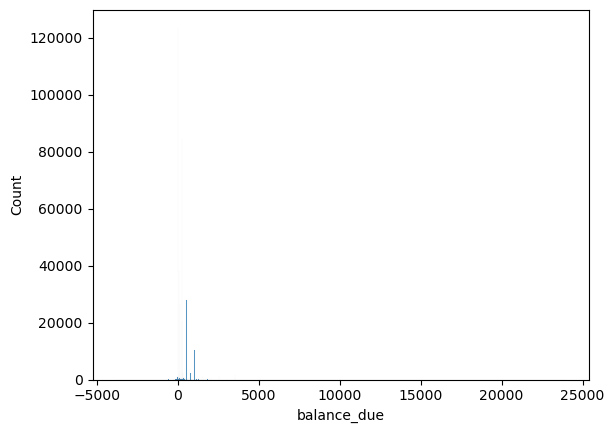

In [19]:
# Show in a histplot the balance due
sns.histplot(df['balance_due'])

In [20]:
# Show the top 50 values in balance due
df['balance_due'].value_counts().head(50)

balance_due
 0.0       122666
 280.0      84409
 80.0       37942
 530.0      28010
 130.0      26678
 230.0      20446
 1030.0     10372
 255.0       3145
 780.0       2469
 155.0       2429
 330.0       2360
 3530.0      1712
 305.0       1470
 1530.0      1393
 55.0        1321
 2530.0      1213
 120.0        875
 380.0        867
 270.0        852
-25.0         851
 310.0        779
 430.0        675
 405.0        624
 75.0         613
-5.0          599
 2030.0       564
 350.0        541
 20.0         513
-10.0         477
 25.0         477
-20.0         476
 50.0         473
 250.0        433
 140.0        432
 630.0        384
-50.0         381
 730.0        379
 30.0         361
 390.0        357
 5.0          350
 85.0         344
 10.0         341
 1430.0       315
 290.0        301
 210.0        296
 100.0        294
 830.0        289
 150.0        286
 480.0        285
 580.0        275
Name: count, dtype: int64

In [21]:
# Show the top 50 values in balance due
df['balance_due'].

balance_due
 107.53     1
-89.00      1
 30.42      1
 522.00     1
 319.36     1
 161.86     1
 563.55     1
 5548.80    1
 455.57     1
 272.55     1
 62.99      1
 937.00     1
 100.68     1
 219.81     1
 1653.18    1
 671.30     1
 464.30     1
 3751.30    1
 309.80     1
 273.40     1
 438.49     1
 451.43     1
 229.49     1
 125.21     1
 23.79      1
 245.04     1
 1422.55    1
 933.80     1
 4585.05    1
 554.30     1
 1853.80    1
 7172.55    1
 450.80     1
 6626.30    1
 433.55     1
 8530.00    1
 59.54      1
 3283.80    1
 3533.80    1
 392.98     1
 810.05     1
 471.80     1
 1064.10    1
 7388.80    1
 398.80     1
 220.74     1
 594.43     1
 222.01     1
 617.55     1
 1480.00    1
Name: count, dtype: int64

In [30]:
df = df.drop(columns=['balance_due'])

## Final dataframe

In [31]:
df.columns

Index(['agency_name', 'violation_street_name', 'state', 'judgment_amount',
       'payment_status', 'violation_category', 'is_judgment_later',
       'discount_status'],
      dtype='object')

In [32]:
df.reset_index(inplace=True,drop=True)

In [33]:
df.head()

,agency_name,violation_street_name,state,judgment_amount,payment_status,violation_category,is_judgment_later,discount_status
0,"Buildings, Safety Engineering & Env Department",Charlevoix,Mi,280.0,NO PAYMENT,No Certificate,1,No Discount
1,"Buildings, Safety Engineering & Env Department",Chrysler,Mi,280.0,PAID IN FULL,No Certificate,0,No Discount
2,"Buildings, Safety Engineering & Env Department",St marys,Mi,280.0,NO PAYMENT,No Certificate,1,No Discount
3,"Buildings, Safety Engineering & Env Department",Warren,Mi,280.0,NO PAYMENT,No Certificate,1,No Discount
4,"Buildings, Safety Engineering & Env Department",Oakland,Mi,280.0,NO PAYMENT,No Certificate,1,No Discount


### City and violation streetname

In [4]:
df[['city','violation_street_name']]

,city,violation_street_name
1,ROSEVILLE,Charlevoix
2,DETROIT,Chrysler
3,DEARBORN,St marys
6,DETROIT,Warren
9,DETROIT,Oakland
...,...,...
629952,DETROIT,Rosemont
629953,DETROIT,Pinehurst
629955,DETROIT,Trinity
629960,DETROIT,Mendota


In [11]:
df['city'] = df['city'].apply(lambda x: x.lower().strip())

In [14]:
df['state'].value_counts()

state
25    318276
12     13168
6      10532
50      4641
37      4131
53      2068
36      1612
38      1559
17      1557
13      1544
34      1108
47      1080
3        989
7        934
42       858
52       745
11       661
59       648
23       635
26       576
30       565
56       536
22       463
1        375
27       333
49       320
10       312
41       283
20       249
14       225
18       219
39       216
21       180
24       179
57       167
15       159
51       149
35       138
46       113
28       111
8        105
0         93
32        85
16        84
2         83
40        72
19        61
4         57
29        52
33        42
54        31
55        25
48        21
58        19
31        17
43        14
44         9
9          4
45         3
5          1
Name: count, dtype: int64

In [ ]:
def state_violator_origin(row):
    if row['state'] == 'MI' and row['city']== 'Detroit':
        return 'Violator living in Detroit'
    elif row['state'] == 'MI' and row['city'] != 'Detroit':
        return 'Violator living in Michigan but not in Detroit'
    else: 
        return 'Violator living outside Michigan'

In [ ]:
df['state'].apply(lambda x: 'MI' if x == 'MI' else 'Other')


## Encode Categorical Values

In [34]:
to_encode = ['agency_name', 'violation_street_name', 'state', 'payment_status', 'violation_category','discount_status']

In [35]:
def label_encode(df):
    label_encoder = LabelEncoder()
    for col in to_encode:
        df[col] = label_encoder.fit_transform(df[col])
    return df

In [36]:
df = label_encode(df)

In [4]:
df.head()

,agency_name,disposition,fine_amount,late_fee,judgment_amount,balance_due,payment_status,violation_category,is_judgment_later,discount_status,violator_origin
1,1,7,250.0,0.0,280.0,280.0,0,1,1,1,0
2,1,6,250.0,0.0,280.0,280.0,1,1,0,1,0
3,1,7,250.0,0.0,280.0,280.0,0,1,1,1,0
6,1,7,250.0,0.0,280.0,280.0,0,1,1,1,0
9,1,7,250.0,0.0,280.0,280.0,0,1,1,1,0


## Export

In [38]:
df.to_csv('df_process.csv')